In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Interactive Plots
This Notebooks is a part of DHH24 Hackathon and group Luxury Books. This Notebook includes Python code to plot an interactive bubble plot using Plotly.

Author: Juho Hotari

In [2]:
df = pd.read_csv('estc_metadata.csv')

In [3]:
df.head()

,estc_id,ecco_id,topic,pages,format,publication_place,publication_country,work_id,ocr_median_quality
0,T90035,71400200,religion,1035,4to,London,England,51463-a complete concordance to holy scripture...,53.80
1,T138709,797500102,science,1346,2fo,London,England,77963-an universal history of arts and sciences,87.90
2,T214794,1491200101,religion,1049,2fo,Edinburgh,Scotland,X-annotations upon the holy bible,73.56
3,T88539,438700102,education,1006,4to,London,England,1653-thesaurus linguae latinae compendiarius,67.70
4,T84401,183600200,education,1511,4to,London,England,4745-linguae latinae liber dictionarius quadri...,58.60


In [4]:
country_counts = df['publication_country'].value_counts()

In [5]:
c = pd.DataFrame({'Country': country_counts.index, 'Occurrences': country_counts.values})

In [6]:
c

,Country,Occurrences
0,England,151900
1,Ireland,19498
2,Scotland,19355
3,USA,9841
4,France,2474
5,Netherlands,783
6,Germany,432
7,Wales,374
8,Switzerland,293
9,Italy,198


In [14]:
c_list = c['Country'].to_list()
result_string = ', '.join(c_list)
result_string

'England, Ireland, Scotland, USA, France, Netherlands, Germany, Wales, Switzerland, Italy, India, Belgium, Jamaica, Austria, Canada, Denmark, Sweden, Saint Kitts and Nevis, Guernsey, Isle of Man, Barbados, Antigua, Haiti, Channel Islands, Malta, Portugal, Spain, Russia, Grenada, Poland, Dominica, South Africa, Hungary, Bahamas, Netherlands Antilles, Saint-Domingue, Northern Ireland'

In [16]:
country_coords = {
    'England': {'lat': 52.3555, 'lon': -1.1743},
    'Ireland': {'lat': 53.4129, 'lon': -8.2439},
    'Scotland': {'lat': 56.4907, 'lon': -4.2026},
    'USA': {'lat': 37.0902, 'lon': -95.7129},
    'France': {'lat': 46.6034, 'lon': 1.8883},
    'Netherlands': {'lat': 52.1326, 'lon': 5.2913},
    'Germany': {'lat': 51.1657, 'lon': 10.4515},
    'Wales': {'lat': 52.1307, 'lon': -3.7837},
    'Switzerland': {'lat': 46.8182, 'lon': 8.2275},
    'Italy': {'lat': 41.8719, 'lon': 12.5674},
    'India': {'lat': 20.5937, 'lon': 78.9629},
    'Belgium': {'lat': 50.5039, 'lon': 4.4699},
    'Jamaica': {'lat': 18.1096, 'lon': -77.2975},
    'Austria': {'lat': 47.5162, 'lon': 14.5501},
    'Canada': {'lat': 56.1304, 'lon': -106.3468},
    'Denmark': {'lat': 56.2639, 'lon': 9.5018},
    'Sweden': {'lat': 60.1282, 'lon': 18.6435},
    'Saint Kitts and Nevis': {'lat': 17.3578, 'lon': -62.782998},
    'Guernsey': {'lat': 49.4482, 'lon': -2.5895},
    'Isle of Man': {'lat': 54.2361, 'lon': -4.5481},
    'Barbados': {'lat': 13.1939, 'lon': -59.5432},
    'Antigua': {'lat': 17.0608, 'lon': -61.7964},
    'Haiti': {'lat': 18.9712, 'lon': -72.2852},
    'Channel Islands': {'lat': 49.3723, 'lon': -2.3644},
    'Malta': {'lat': 35.9375, 'lon': 14.3754},
    'Portugal': {'lat': 39.3999, 'lon': -8.2245},
    'Spain': {'lat': 40.4637, 'lon': -3.7492},
    'Russia': {'lat': 61.5240, 'lon': 105.3188},
    'Grenada': {'lat': 12.1165, 'lon': -61.6790},
    'Poland': {'lat': 51.9194, 'lon': 19.1451},
    'Dominica': {'lat': 15.4150, 'lon': -61.3710},
    'South Africa': {'lat': -30.5595, 'lon': 22.9375},
    'Hungary': {'lat': 47.1625, 'lon': 19.5033},
    'Bahamas': {'lat': 25.0343, 'lon': -77.3963},
    'Netherlands Antilles': {'lat': 12.2260, 'lon': -69.0600},
    'Saint-Domingue': {'lat': 18.9712, 'lon': -72.2852},  # Same as Haiti
    'Northern Ireland': {'lat': 54.7877, 'lon': -6.4923}
}

In [17]:
c['Latitude'] = c['Country'].map(lambda country: country_coords[country]['lat'])
c['Longitude'] = c['Country'].map(lambda country: country_coords[country]['lon'])

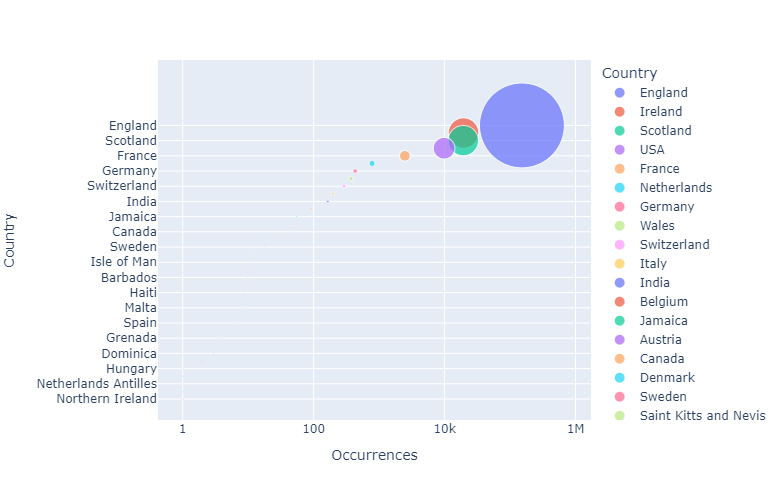

In [57]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(c, x="Occurrences", y="Country",
	         size="Occurrences", color="Country",
                 hover_name="Country", log_x=True, size_max=60, width=1000, height=500)
fig.show()
fig.write_html("countries.plot.html")

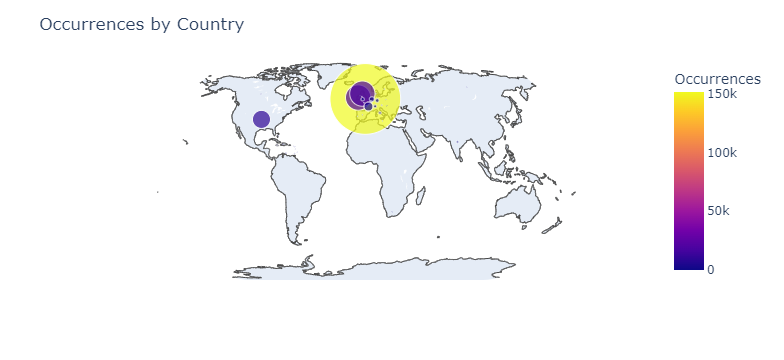

In [24]:
# Create the bubble map
fig = px.scatter_geo(c, 
                     lat='Latitude', 
                     lon='Longitude', 
                     size='Occurrences', 
                     hover_name='Country', 
                     projection='natural earth',
                     size_max=50,  # Adjust this value to increase bubble size
                     color='Occurrences',  # Color based on occurrences
                     color_continuous_scale=px.colors.sequential.Plasma)  # Use a vibrant color scale

# Update the layout for better visualization
fig.update_layout(title='Occurrences by Country',
                  geo=dict(showframe=False, showcoastlines=True))

# Show the plot
fig.show()
fig.write_html("worldmap.plot.html")